In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [2]:
jhmdb_path = "/home/yutongq/deeplearning/project/jhmdb"

In [3]:
def bbox_size(bbox):
    '''
    bbox: x1, y1, x2, y2
    '''
    return (bbox[3] - bbox[1]) * (bbox[2] - bbox[0])

In [4]:
def avg_bbox_size(bboxes):
    return np.mean([bbox_size(bbox) for bbox in bboxes])

In [5]:
def read_bbox(txt_file):
    gt_line = open(txt_file).readline().split(" ")
    cls = int(gt_line[0])
    bbox = np.array([int(i) for i in gt_line[1:]])
    size = bbox_size(bbox)
    return cls, bbox, size

In [6]:
def plot_bbox_size(bbox):
    print("Printing bbox:", bbox, "Size:", bbox_size(bbox))
    return (bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1]

In [7]:
def plot_img_bbox(img_path, label_path, plotting=False):

    # read img
    img = cv2.imread(img_path)
    im_rgb = 0
    try:
        im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except Exception as error:
        print(img_path, error)
        return
    
    h,w,_ = im_rgb.shape
    
    
    # read label
    cls,bbox,size = read_bbox(label_path)
    
    
    # how much we should shrink
    scaling = np.sqrt(size / SMALL)


    if scaling > 1:

        # compute padding and new bbox
        padding_h = int(h * (scaling) - h)//2
        padding_w = int(w * (scaling) - w)//2
        new_bbox = bbox+np.array([padding_w, padding_h, padding_w, padding_h])
    
        
        # pad borders
        GREEN = [0,255,0]
        replicate = cv2.copyMakeBorder(im_rgb,padding_h,padding_h,padding_w,padding_w,cv2.BORDER_REPLICATE)
        constant= cv2.copyMakeBorder(im_rgb,padding_h,padding_h,padding_w,padding_w,cv2.BORDER_CONSTANT,value=GREEN)

        # resize_bbox
        new_h, new_w, _ = replicate.shape
        scaling = h/new_h
        new_bbox = np.ceil(new_bbox *scaling)

        # resize padded images
        replicate = cv2.resize(replicate, (w,h), interpolation=cv2.INTER_AREA)
        constant = cv2.resize(constant, (w,h), interpolation=cv2.INTER_AREA)

        if plotting:
            # plotting
            plt.figure(figsize=(h*5/my_dpi, w*5/my_dpi), dpi=my_dpi)
            ax1 = plt.subplot(231)
            ax1.imshow(im_rgb,'gray'),plt.title('ORIGINAL')
            rect_orig = plot_bbox_size(bbox)
            rect = patches.Rectangle(rect_orig[0], rect_orig[1], rect_orig[2], linewidth=1, edgecolor='r', facecolor='none')
            ax1.add_patch(rect)

            ax2=plt.subplot(232)
            ax2.imshow(constant,'gray'),plt.title('CONSTANT')
            new_rect = plot_bbox_size(new_bbox)
            rect = patches.Rectangle(new_rect[0], new_rect[1], new_rect[2], linewidth=1, edgecolor='r', facecolor='none')
            ax2.add_patch(rect)

            ax3=plt.subplot(233)
            ax3.imshow(replicate,'gray'),plt.title('REPLICATE')
            new_rect = plot_bbox_size(new_bbox)
            rect = patches.Rectangle(new_rect[0], new_rect[1], new_rect[2], linewidth=1, edgecolor='r', facecolor='none')
            ax3.add_patch(rect)

            plt.show()
    
        return scaling, replicate, constant, new_bbox, cls
    else:
        return 1, im_rgb, im_rgb, bbox, cls

In [8]:
SMALL = 32*32
my_dpi=144

print("SMALL is", SMALL)

# smaller box (< 32*32)
img_path_s = jhmdb_path+"/rgb-images/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_0/00018.png"
label_path_s=jhmdb_path+"/labels/shoot_ball_PlayingBasketballGotWater_shoot_ball_f_nm_np1_ba_med_0_00018.txt"

# medium box
label_path_m = jhmdb_path+"/labels/climb_stairs_How_to_Exercise_Outdoors_-_Outdoor_Step_Running_Exercises_climb_stairs_f_nm_np1_fr_med_0_00010.txt"
img_path_m = jhmdb_path+"/rgb-images/climb_stairs/How_to_Exercise_Outdoors_-_Outdoor_Step_Running_Exercises_climb_stairs_f_nm_np1_fr_med_0/00010.png"

# large box
label_path_l = jhmdb_path+"/labels/brush_hair_Brushing_my_hair_-_December_2008_brush_hair_u_cm_np1_ba_goo_1_00015.txt"
img_path_l = jhmdb_path+"/rgb-images/brush_hair/Brushing_my_hair_-_December_2008_brush_hair_u_cm_np1_ba_goo_1/00015.png"

SMALL is 1024


Printing bbox: [145  72 169 135] Size: 1512
Printing bbox: [149.  81. 168. 133.] Size: 988.0
Printing bbox: [149.  81. 168. 133.] Size: 988.0


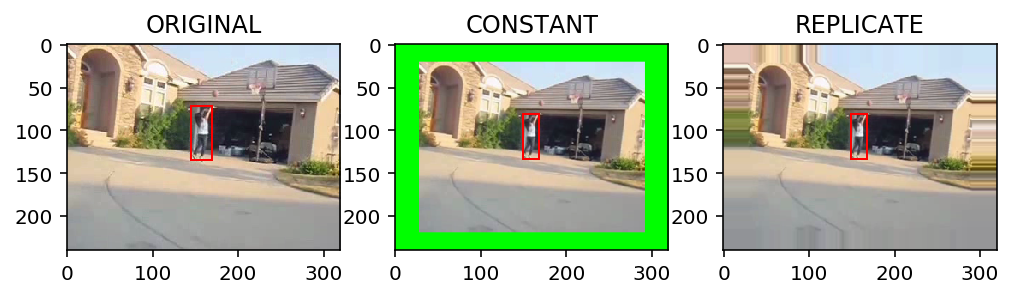

0.8275862068965517
Printing bbox: [140  75 190 207] Size: 6600
Printing bbox: [153. 103. 173. 155.] Size: 1040.0
Printing bbox: [153. 103. 173. 155.] Size: 1040.0


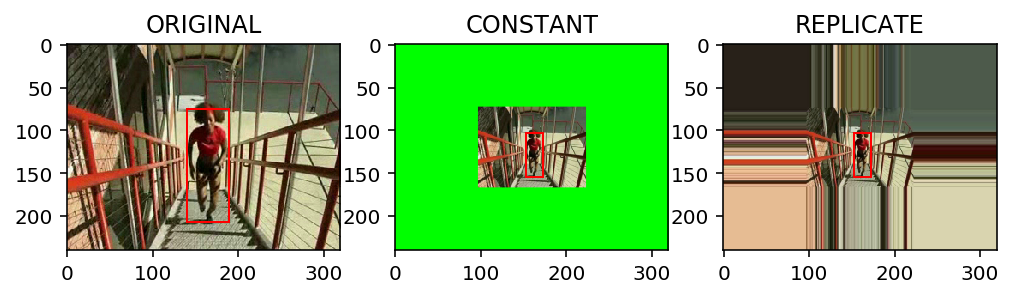

0.39473684210526316
Printing bbox: [ 64   1 320 240] Size: 61184
Printing bbox: [148. 105. 181. 136.] Size: 1023.0
Printing bbox: [148. 105. 181. 136.] Size: 1023.0


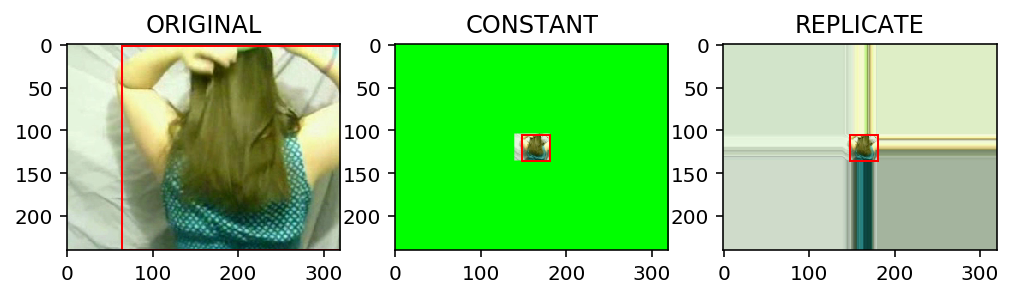

0.12944983818770225


In [9]:
s = plot_img_bbox(img_path_s, label_path_s,plotting=True)
print(s[0])
s = plot_img_bbox(img_path_m, label_path_m,plotting=True)
print(s[0])
s = plot_img_bbox(img_path_l, label_path_l,plotting=True)
print(s[0])

## run on all jhmdb images

In [30]:
target_dir_rep = "/home/yutongq/deeplearning/project/replicate_jhmdb_1/"
target_dir_const = "/home/yutongq/deeplearning/project/constant_jhmdb_1/"

## create folders if not exist
if not os.path.isdir(target_dir_rep):
    os.mkdir(target_dir_rep)

if not os.path.isdir(target_dir_const):
    os.mkdir(target_dir_const)
    
if not os.path.isdir(target_dir_rep+"/rgb-images"):
    os.mkdir(target_dir_rep+"/rgb-images")

if not os.path.isdir(target_dir_rep+"/labels"):
    os.mkdir(target_dir_rep+"/labels")   
    
if not os.path.isdir(target_dir_const+"/rgb-images"):
    os.mkdir(target_dir_const+"/rgb-images")

if not os.path.isdir(target_dir_const+"/labels"):
    os.mkdir(target_dir_const+"/labels")   

scaling_threshold = 0.3

In [31]:
def plot_three_panels(im_rgb, replicate, constant, bbox, new_bbox):
    
    h,w,_ = im_rgb.shape

    plt.figure(figsize=(h*5/my_dpi, w*5/my_dpi), dpi=my_dpi)
    ax1 = plt.subplot(231)
    ax1.imshow(im_rgb,'gray'),plt.title('ORIGINAL')
    rect_orig = plot_bbox_size(bbox)
    rect = patches.Rectangle(rect_orig[0], rect_orig[1], rect_orig[2], linewidth=1, edgecolor='r', facecolor='none')
    ax1.add_patch(rect)

    ax2=plt.subplot(232)
    ax2.imshow(constant,'gray'),plt.title('CONSTANT')
    new_rect = plot_bbox_size(new_bbox)
    rect = patches.Rectangle(new_rect[0], new_rect[1], new_rect[2], linewidth=1, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)

    ax3=plt.subplot(233)
    ax3.imshow(replicate,'gray'),plt.title('REPLICATE')
    new_rect = plot_bbox_size(new_bbox)
    rect = patches.Rectangle(new_rect[0], new_rect[1], new_rect[2], linewidth=1, edgecolor='r', facecolor='none')
    ax3.add_patch(rect)

    plt.show()
    
    print("here")
    

In [68]:
def check_prefix_exists(prefix, base_dir):
    ## prefix = [category,video_name]
    
    category = prefix[0]
    video_name = prefix[1]
    
    flag = True

    # check if saving directories exist
    if not os.path.isdir(os.path.join(base_dir, "rgb-images")):
        print("mkdir",os.path.join(base_dir, "rgb-images"))
        os.mkdir(os.path.join(base_dir, "rgb-images"))
        flag = flag & False
    
    if not os.path.isdir(os.path.join(base_dir, "labels")):
        print("mkdir",os.path.join(base_dir, "labels"))
        os.mkdir(os.path.join(base_dir, "labels"))
        flag = flag & False
    
    if not os.path.isdir(os.path.join(base_dir, "rgb-images", category)):
        print("mkdir",os.path.join(base_dir, "rgb-images", category))
        os.mkdir(os.path.join(base_dir, "rgb-images", category))
        flag = flag & False
        
    if not os.path.isdir(os.path.join(base_dir,"rgb-images",*prefix)):
        print("mkdir",os.path.join(base_dir,"rgb-images",*prefix))
        os.mkdir(os.path.join(base_dir,"rgb-images",*prefix))
        flag = flag & False
        
    if not os.path.isdir(os.path.join(base_dir, "labels", category)):
        print("mkdir",os.path.join(base_dir, "labels", category))
        os.mkdir(os.path.join(base_dir, "labels", category))
        flag = flag & False
        
    if not os.path.isdir(os.path.join(base_dir,"labels",*prefix)):
        print("mkdir",os.path.join(base_dir,"labels",*prefix))
        os.mkdir(os.path.join(base_dir,"labels",*prefix))
        flag = flag & False
        
    return flag

In [69]:
def pad_single_frame(img_path, scaling, bbox):
    
    # read img
    img = cv2.imread(img_path)
    im_rgb = 0
    try:
        im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except Exception as error:
        print(img_path, error)
        return
    
    if scaling < 1:
        return scaling, im_rgb, im_rgb, bbox
    
    h,w,_ = im_rgb.shape
    
    # compute padding and new bbox
    padding_h = int(h * (scaling) - h)//2
    padding_w = int(w * (scaling) - w)//2
    new_bbox = bbox+np.array([padding_w, padding_h, padding_w, padding_h])


    # pad borders
    GREEN = [0,255,0]
    replicate = cv2.copyMakeBorder(im_rgb,padding_h,padding_h,padding_w,padding_w,cv2.BORDER_REPLICATE)
    constant= cv2.copyMakeBorder(im_rgb,padding_h,padding_h,padding_w,padding_w,cv2.BORDER_CONSTANT,value=GREEN)

    # resize_bbox
    new_h, new_w, _ = replicate.shape
    scaling = h/new_h
    new_bbox = np.ceil(new_bbox *scaling)

    # resize padded images
    replicate = cv2.resize(replicate, (w,h), interpolation=cv2.INTER_AREA)
    constant = cv2.resize(constant, (w,h), interpolation=cv2.INTER_AREA)
    
#     plot_three_panels(im_rgb, replicate, constant, bbox, new_bbox)
    
    return scaling, replicate, constant, new_bbox

In [70]:
def pad_video(img_paths, bboxes):
    avg_bbox_size = np.mean([bbox[2] for bbox in bboxes])
    
    scaling = np.sqrt(avg_bbox_size / SMALL)
    
    new_bboxes = []
    new_replicate = []
    new_constant = []
    
    ## need to pad frames if the avg bounding box size is > SMALL
    for i,path in enumerate(img_paths):
        scaling_2, replicate, constant, new_bbox = pad_single_frame(path, scaling, bboxes[i][1])
        new_bboxes.append(new_bbox)
        new_replicate.append(replicate)
        new_constant.append(constant)

    return scaling, new_replicate, new_constant, new_bboxes

In [71]:
# read all the file lists
test_list = [l.rstrip("\n") for l in open(jhmdb_path+"/testlist.txt")]
train_list = [l.rstrip("\n") for l in open(jhmdb_path+"/trainlist.txt")]
test_list_video = [l.rstrip("\n") for l in open(jhmdb_path+"/testlist_video.txt")]

In [72]:
test_list[0]

'brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0/00001.txt'

In [82]:
from collections import defaultdict
# create dictionary corresponding video to image path
label_dict = defaultdict(list)
img_dict = defaultdict(list)

for txt in test_list+train_list:
    video = "/".join(txt.split("/")[:-1])
#     videos.append(video)
    label_path = "_".join(txt.split("/"))
    label_dict[video].append("/labels/"+txt)
    img_path = jhmdb_path+"/rgb-images/"+txt[:-4]+".png"
    img_dict[video].append(img_path)

videos = list(label_dict.keys())

In [85]:
len(videos)

928

In [84]:
total = 0
not_found = []
i = 0
all_scaling = []
roots = []
bboxes = []
labels = []
# for root, dirs, files in os.walk(jhmdb_path+"/rgb-images"):
#     depth = root.count(os.path.sep)
#     if depth == 8 and "AppleDouble" not in root:
#         print(i,root)
#         total+= len(files)
#         avg_scaling = []
        
#         label_suffixes = []
#         img_paths = []
#         bboxes = []
        
#         cont_flag = False
#         for img in files:
#             if img[0] != ".":
#                 img_path = os.path.join(root, img)
#                 label_suffix="/labels/"+"_".join(root.split("/")[-2:]+[img.split(".")[0]])+".txt"
#                 label_path = jhmdb_path+label_suffix
                
#                 label_suffixes.append(label_suffix)
#                 img_paths.append(img_path)
#                 try:
#                     box = read_bbox(label_path)
#                     bboxes.append(box)
#                 except IOError:
#                     not_found.append(root)
#                     cont_flag = True
#                     break
#         if cont_flag:
#             continue
for i,video in enumerate(videos):
    print("[",str(i)+"/"+str(len(videos)),"]",video)
    img_paths = img_dict[video]
    label_suffixes = label_dict[video]
    bboxes = [read_bbox(jhmdb_path+"/labels/"+"_".join(p.split("/")[2:])) for p in label_suffixes]

    scaling, new_replicate, new_constant, new_bboxes = pad_video(img_paths, bboxes)
    all_scaling.append(scaling)

    for label_suffix, img_path, replicate, constant, new_bbox, bbox in zip(label_suffixes, img_paths, new_replicate, new_constant, new_bboxes, bboxes):
        img = os.path.basename(img_path)
        out_bbox = [str(bbox[0])] + [str(int(b)) for b in new_bbox]
        prefix = video.split("/")
        
#         print(target_dir_const+label_suffix)

        check_prefix_exists(prefix, target_dir_rep)
        if not os.path.isfile(os.path.join(target_dir_rep, "rgb-images", *prefix, img)):
            cv2.imwrite(os.path.join(target_dir_rep, "rgb-images", *prefix,img), cv2.cvtColor(replicate, cv2.COLOR_RGB2BGR))
            with open(target_dir_rep+label_suffix,"w") as towrite:
                towrite.write(" ".join(out_bbox)+"\n")

        check_prefix_exists(prefix, target_dir_const)
        if not os.path.isfile(os.path.join(target_dir_const, "rgb-images", *prefix, img)):
            cv2.imwrite(os.path.join(target_dir_const, "rgb-images", *prefix,img), cv2.cvtColor(constant, cv2.COLOR_RGB2BGR))
            with open(target_dir_const+label_suffix,"w") as towrite:
                towrite.write(" ".join(out_bbox)+"\n")
    i+=1
            

0/928 brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0
1/928 brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_1
2/928 brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yuton

15/928 catch/LearnToShootFromTheMaster_catch_f_cm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/catch/LearnToShootFromTheMaster_catch_f_cm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/catch/LearnToShootFromTheMaster_catch_f_cm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/catch/LearnToShootFromTheMaster_catch_f_cm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/catch/LearnToShootFromTheMaster_catch_f_cm_np1_ba_med_6
16/928 catch/LearnToShootFromTheMaster_catch_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/catch/LearnToShootFromTheMaster_catch_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/catch/LearnToShootFromTheMaster_catch_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/catch/LearnToShootFromTheMaster_catch_f_nm_np1_ba_med_0
mkdir /

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/clap/Applauding_Abby_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/clap/Applauding_Abby_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/clap/Applauding_Abby_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/clap/Applauding_Abby_clap_u_nm_np1_fr_med_1
30/928 clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/clap/Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0
31/928 

43/928 climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_3
44/928 climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/I_DO_NOT_Run_Up_Stairs_Like_A_GIRL_climb_stairs_l_cm_np1_ba_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/climb_stairs/I_DO_NOT_Run_U

57/928 golf/Golfswing_golf_f_cm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/golf/Golfswing_golf_f_cm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/golf/Golfswing_golf_f_cm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/golf/Golfswing_golf_f_cm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/golf/Golfswing_golf_f_cm_np1_ri_goo_1
58/928 golf/Jeff_Ritter_-_Power_Drill_golf_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/golf/Jeff_Ritter_-_Power_Drill_golf_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/golf/Jeff_Ritter_-_Power_Drill_golf_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/golf/Jeff_Ritter_-_Power_Drill_golf_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/golf/Jeff_Ritter_-_Power_Drill_golf_f_nm

72/928 jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_6
73/928 jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/jump/prelinger_ControlY1950_jump_f_nm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/constant_jh

86/928 pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pick
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pick
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pick
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pick
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pick/Collecting_litter_on_the_woodland_ground_surface_pick_f_nm_np1_fr_med_0
87/928 pick/Fishing_For_People_pick_f_cm_np1_fr_

100/928 pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_0
101/928 pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/Bartender_of_America_Bartending_School_pour_u_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/c

115/928 pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_1
116/928 pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pullup/20_good_form_pullups_pullup_f_nm_np1_ri_goo_2
mkdir /home/yutongq/deeplearning

130/928 push/Alexander_pushing_the_table_push_f_cm_np1_ba_bad_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push/Alexander_pushing_the_table_push_f_cm_np1_ba_bad_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/push
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/push/Alexander_pushing_the_table_push_f_cm_np1_ba_bad_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/push
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/push/Alexander_pushing_the_table_push_f_cm_np1_ba_bad_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/push
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/push/Alexander_pushing_the_table_push_f_cm_np1_ba_bad_1
131/928 push/Alexander_pushing_the_table_push_f_cm_np1_le_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push/Alexander_pus

145/928 run/IamLegend_run_f_nm_np1_le_med_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/run/IamLegend_run_f_nm_np1_le_med_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/run/IamLegend_run_f_nm_np1_le_med_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/run/IamLegend_run_f_nm_np1_le_med_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/run/IamLegend_run_f_nm_np1_le_med_3
146/928 run/RATRACE_run_f_cm_np1_ba_med_14
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/run/RATRACE_run_f_cm_np1_ba_med_14
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/run/RATRACE_run_f_cm_np1_ba_med_14
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/run/RATRACE_run_f_cm_np1_ba_med_14
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/run/RATRACE_run_f_cm_np1_ba_med_14
147/928 run/RATRACE_run_f_cm_np1_fr_med_16
mkdir /home/yutongq/deeplearning/project/repli

160/928 shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_ball/PlayingBasketballGotWater_shoot_ball_f_nm_np1_ri_med_1
161/928 shoot_ball/PlayingBasketball_shoot_ball_f_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_ball/PlayingBasketball_shoot_ball_f_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_ball/PlayingBasketball_shoot_ball_f_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot

174/928 shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_1
175/928 shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/Shootingarecurve_shoot_bow_u_nm_np1_fr_med_2
mkdir /home/yu

189/928 shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_gun/FirearmsTraining_shoot_gun_u_nm_np1_ri_med_4
190/928 shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/MeShootin2_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/proje

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/sit/Prelinger_HabitPat1954_sit_u_cm_np1_le_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/sit/Prelinger_HabitPat1954_sit_u_cm_np1_le_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/sit/Prelinger_HabitPat1954_sit_u_cm_np1_le_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/sit/Prelinger_HabitPat1954_sit_u_cm_np1_le_med_8
205/928 sit/TrumanShow_sit_f_nm_np1_le_med_37
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/sit/TrumanShow_sit_f_nm_np1_le_med_37
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/sit/TrumanShow_sit_f_nm_np1_le_med_37
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/sit/TrumanShow_sit_f_nm_np1_le_med_37
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/sit/TrumanShow_sit_f_nm_np1_le_med_37
206/928 sit/likebeckam_sit_f_nm_np1_le_bad_29
mkdir /home/yutongq/

219/928 swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_0
220/928 swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/Tannerafterwecorrected_swing_baseball_f_cm_np1_fr_bad_1
mkdir /hom

233/928 throw/KnifeThrowing_throw_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw/KnifeThrowing_throw_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/throw
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/throw/KnifeThrowing_throw_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/throw
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/throw/KnifeThrowing_throw_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/throw
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/throw/KnifeThrowing_throw_f_nm_np1_le_med_0
234/928 throw/KnifeThrowing_throw_f_nm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw/KnifeThrowing_throw_f_nm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/r

248/928 walk/Juno_walk_f_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/walk/Juno_walk_f_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/walk/Juno_walk_f_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/walk/Juno_walk_f_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/walk/Juno_walk_f_cm_np1_fr_med_8
249/928 walk/LONGESTYARD_walk_f_nm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/walk/LONGESTYARD_walk_f_nm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/walk/LONGESTYARD_walk_f_nm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/walk/LONGESTYARD_walk_f_nm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/walk/LONGESTYARD_walk_f_nm_np1_fr_med_6
250/928 walk/Panic_in_the_Streets_walk_u_cm_np1_ba_med_5
mkdir /home/yutongq/de

264/928 wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_1
265/928 wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/wave/Maya_beim_Winken_wave_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/wave/Maya_beim_Winken_wave_f_cm_np1_fr_

278/928 brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_le_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_le_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_le_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_le_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_le_goo_1
279/928 brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_ri_goo_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/brush_hair/me_brushing_my_hair_lol_i_was_being_silly_brush_hair_u_nm_np1_ri_goo_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/brus

290/928 brush_hair/Silky_Straight_Hair_Original_brush_hair_h_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/brush_hair/Silky_Straight_Hair_Original_brush_hair_h_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/brush_hair/Silky_Straight_Hair_Original_brush_hair_h_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/brush_hair/Silky_Straight_Hair_Original_brush_hair_h_nm_np1_ba_goo_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/brush_hair/Silky_Straight_Hair_Original_brush_hair_h_nm_np1_ba_goo_1
291/928 brush_hair/Silky_Straight_Hair_Original_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/brush_hair/Silky_Straight_Hair_Original_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/brush_hair/Silky_Straight_Hair_Original_brush_hair_u_nm_np1_ba_goo_2
mkdir /home/yutongq/deeple

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_4
304/928 catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/catch/Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_5
mkdir /home/yutongq/deeplearn

316/928 catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_fr_med_5
317/928 catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/catch/Torwarttraining_3_(_sterreich)_catch_f_nm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/catch/Torwarttraining

331/928 clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_0
332/928 clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/clap/RE-_Boom_Snap_Clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/clap/RE-_Boom_Snap_Cl

346/928 clap/boom-snap-clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/clap/boom-snap-clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/clap/boom-snap-clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/clap/boom-snap-clap_clap_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/clap/boom-snap-clap_clap_u_nm_np1_fr_med_1
347/928 clap/boom-snap-clap_clap_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/clap/boom-snap-clap_clap_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/clap/boom-snap-clap_clap_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/clap/boom-snap-clap_clap_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/clap/boom-snap-clap_clap_u_nm_np1_fr_med_2
348/928 clap/b

362/928 climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba_med_0
363/928 climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/Sports_Training_-_Speed_Workouts_-_Stair_Running_climb_stairs_f_nm_np1_ba

374/928 climb_stairs/Stadium_Plyometric_Workout_climb_stairs_l_cm_np1_ri_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/Stadium_Plyometric_Workout_climb_stairs_l_cm_np1_ri_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/climb_stairs/Stadium_Plyometric_Workout_climb_stairs_l_cm_np1_ri_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/climb_stairs/Stadium_Plyometric_Workout_climb_stairs_l_cm_np1_ri_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/climb_stairs/Stadium_Plyometric_Workout_climb_stairs_l_cm_np1_ri_med_2
375/928 climb_stairs/Micah_Lacerte_Running_Stairs___Great_cardio_for_fat_loss_climb_stairs_f_cm_np1_ba_med_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/Micah_Lacerte_Running_Stairs___Great_cardio_for_fat_loss_climb_stairs_f_cm_np1_ba_med_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/climb_stairs/Micah_La

385/928 climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_5
386/928 climb_stairs/H_I_I_T__Swamis_stairs_with_Max_Wettstein_featuring_Donna_Wettstein_climb_stairs_f_cm_np1_ba_med_7
mkdir /home/yutongq/deeplearning/project/r

398/928 golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_0
399/928 golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/golf/Rate_my_golf_swing__driver_and_9_iron_golf_f_cm_np1_ri_med_1
mkdir /home/yutongq/deeplearning/project/constant_

414/928 golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/golf/Golf_Tips_-_Hit_The_Driver_300+_Yards!!!_golf_f_nm_np1_fr_med_0
415/928 golf/Ernie_Els_swing_close_up_golf_f_cm_np1_ri_goo_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/golf/Ernie_Els_swing_close_up_golf_f_cm_np1_ri_goo_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/golf/Ernie_Els_swing_close_up_golf_f_cm_np1_ri_goo_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/golf/

429/928 jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_5
430/928 jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/jump/Documentario_Le_Parkour_Londrina_jump_f_cm_np1_ri_bad_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/jump/Documentario_Le_

444/928 jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_bad_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_bad_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_bad_7
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_bad_7
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_bad_7
445/928 jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/jump/Stadium_Plyometric_Workout_jump_f_cm_np1_ba_med_8
mkdir /home/yu

458/928 kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_3
459/928 kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/kick_ball/How_to_Shoot_Penalty_Kicks_kick_ball_f_cm_np1_ba_bad_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/

471/928 kick_ball/Das_Wunder_von_Bern_(Deutschland_2002_2003)_kick_ball_f_cm_np1_ri_goo_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/kick_ball/Das_Wunder_von_Bern_(Deutschland_2002_2003)_kick_ball_f_cm_np1_ri_goo_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/kick_ball/Das_Wunder_von_Bern_(Deutschland_2002_2003)_kick_ball_f_cm_np1_ri_goo_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/kick_ball/Das_Wunder_von_Bern_(Deutschland_2002_2003)_kick_ball_f_cm_np1_ri_goo_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/kick_ball/Das_Wunder_von_Bern_(Deutschland_2002_2003)_kick_ball_f_cm_np1_ri_goo_3
472/928 pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pick/Die_Pfandpiraten_Doku_pick_f_cm_np1_ba_med_2
mkdir /home/yutong

486/928 pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_1
487/928 pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pick/pick_up_trash_says_yeti_pick_f_cm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/

501/928 pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_0
502/928 pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/How_to_Build_a_Cocktail_pour_u_nm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/

515/928 pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pour/Spirit_Pouring_pour_u_nm_np1_fr_goo_2
516/928 pour/Cachaca_cocktails_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/Cachaca_cocktails_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/Cachaca_cocktails_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/Cachaca_cocktails_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pour/Cachaca_cocktails_pour_u_nm_np1_fr_med_0

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_0
530/928 pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pour/Flaming_B52_Shot_Drink_pour_u_nm_np1_fr

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_0
544/928 pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pullup/Girl_does_12_pull-ups_pullup_u_cm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pullup/Girl_does_12_

558/928 pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_3
559/928 pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/20_Marine_Corps_Pull_Ups_-_JimmyDShea_pullup_f_cm_np1_ba_bad_4
mkdir /home/yutong

574/928 pullup/girl_pull_ups_fitness_exercise_pullups_pullup_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/girl_pull_ups_fitness_exercise_pullups_pullup_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/girl_pull_ups_fitness_exercise_pullups_pullup_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/pullup/girl_pull_ups_fitness_exercise_pullups_pullup_f_cm_np1_fr_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/pullup/girl_pull_ups_fitness_exercise_pullups_pullup_f_cm_np1_fr_med_2
575/928 pullup/22_Pull-ups_with_Speed_and_Perfect_Form_pullup_f_cm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/pullup/22_Pull-ups_with_Speed_and_Perfect_Form_pullup_f_cm_np1_ba_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/pullup/22_Pull-ups_with_Speed_and_Perfect_Form_pullup_f_cm_np1_ba_med_0
mkdir /

590/928 push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/push/Baby_Push_Cart_push_f_cm_np1_ri_bad_2
591/928 push/Pushing_train_-_Me_and_my_friend_-_Worlds_strongest_men_push_f_cm_np2_ri_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push/Pushing_train_-_Me_and_my_friend_-_Worlds_strongest_men_push_f_cm_np2_ri_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/push/Pushing_train_-_Me_and_my_friend_-_Worlds_strongest_men_push_f_cm_np2_ri_bad_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/push/Pushing_train_-_Me_and_my_friend_-_Wo

605/928 push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_3
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_3
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_3
606/928 push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/push/Cross_Pushing_Table_push_f_cm_np1_fr_bad_7
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/push/Cross_P

622/928 run/likebeckam_run_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/run/likebeckam_run_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/run/likebeckam_run_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/run/likebeckam_run_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/run/likebeckam_run_f_cm_np1_fr_med_5
623/928 run/likebeckam_run_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/run/likebeckam_run_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/run/likebeckam_run_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/run/likebeckam_run_f_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/run/likebeckam_run_f_cm_np1_ri_med_0
624/928 run/20060723sfjffsomelikeitwarmed_run_f_nm_np1_fr_med_6
mkdir /hom

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_ball/ImprovingBasketballSkills-BasketballTurnaroundFadeAway_shoot_ball_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_ball/ImprovingBasketballSkills-BasketballTurnaroundFadeAway_shoot_ball_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_ball/ImprovingBasketballSkills-BasketballTurnaroundFadeAway_shoot_ball_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_ball/ImprovingBasketballSkills-BasketballTurnaroundFadeAway_shoot_ball_f_nm_np1_ri_med_0
639/928 shoot_ball/ImprovingBasketballSkills-BasketballNBA3-PointShots_shoot_ball_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_ball/ImprovingBasketballSkills-BasketballNBA3-PointShots_shoot_ball_f_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_ball/ImprovingBa

652/928 shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_17
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_17
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_17
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_17
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_17
653/928 shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_9
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_9
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_ball/Clay_sBasketballSkillz_shoot_ball_u_nm_np1_ba_med_9
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/

667/928 shoot_bow/11408ErikaRecurvefront_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/11408ErikaRecurvefront_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/11408ErikaRecurvefront_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/11408ErikaRecurvefront_shoot_bow_u_nm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_bow/11408ErikaRecurvefront_shoot_bow_u_nm_np1_fr_med_1
668/928 shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/MegaPrecisionArchery_shoot_bow_u_nm_np1_fr_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/MegaPrecisionArch

681/928 shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_f_nm_np1_ri_med_5
682/928 shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_cm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/Updatedvideoofmeshootingteamusaarchery_shoot_bow_u_cm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/Updatedvideoofmeshootingteamu

695/928 shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_19
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_19
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_19
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_19
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_19
696/928 shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_20
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_20
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_bow/ArcheryFastShooting_shoot_bow_u_nm_np1_fr_med_20
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_bow/ArcheryFastShooting_shoot_b

710/928 shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_1
711/928 shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/shooting_shoot_gun_u_nm_np1_le_med_2
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_gun/shooting_sh

726/928 shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_4
727/928 shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/GLOCK17_shoot_gun_f_nm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_gun/GLOCK17_shoot_gun_f_

741/928 shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/shoot_gun/2xFullautoGlocks_shoot_gun_u_cm_np1_le_med_0
742/928 shoot_gun/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/shoot_gun/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/shoot_gun/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/shoot_gun/AprilshootinganMP5_shoot_gun_u_nm_np1_ri_med_0
mkdir 

758/928 sit/American_History_X_sit_u_cm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/sit/American_History_X_sit_u_cm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/sit/American_History_X_sit_u_cm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/sit/American_History_X_sit_u_cm_np1_fr_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/sit/American_History_X_sit_u_cm_np1_fr_med_6
759/928 sit/American_History_X_sit_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/sit/American_History_X_sit_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/sit/American_History_X_sit_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/sit/American_History_X_sit_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/sit/American_History_X_sit_u_cm_np1_fr_

775/928 stand/TheLastManOnearth_stand_f_nm_np1_fr_med_24
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/stand/TheLastManOnearth_stand_f_nm_np1_fr_med_24
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/stand/TheLastManOnearth_stand_f_nm_np1_fr_med_24
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/stand/TheLastManOnearth_stand_f_nm_np1_fr_med_24
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/stand/TheLastManOnearth_stand_f_nm_np1_fr_med_24
776/928 stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/stand/20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0
mkdir /home/yutongq/deeplearning/project/constan

791/928 stand/RATRACE_stand_f_cm_np1_le_med_35
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/stand/RATRACE_stand_f_cm_np1_le_med_35
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/stand/RATRACE_stand_f_cm_np1_le_med_35
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/stand/RATRACE_stand_f_cm_np1_le_med_35
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/stand/RATRACE_stand_f_cm_np1_le_med_35
792/928 stand/RATRACE_stand_f_cm_np1_ri_med_28
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/stand/RATRACE_stand_f_cm_np1_ri_med_28
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/stand/RATRACE_stand_f_cm_np1_ri_med_28
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/stand/RATRACE_stand_f_cm_np1_ri_med_28
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/stand/RATRACE_stand_f_cm_np1_ri_med_28
793/928 stand/RETURN_OF_THE_KING_stand_u_cm_np1_fr_med

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_4
805/928 swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/practicingmybaseballswing2009_swing_baseball_f_cm_np1_fr_med_5
mkdir /home/yutongq/deeplearning/project

817/928 swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_23
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_23
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_23
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_23
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_ba_med_23
818/928 swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_26
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_26
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/Faith_Rewarded_swing_baseball_f_nm_np1_fr_bad_26
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-imag

831/928 swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_ba_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_ba_med_4
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_ba_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_ba_med_4
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_ba_med_4
832/928 swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_fr_med_10
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_fr_med_10
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/swing_baseball/BaseballSwingAnalysis_swing_baseball_u_nm_np1_fr_med_10
mkdir /home/yut

846/928 throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_1
847/928 throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_10
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_10
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_10
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_10
mkdir /hom

861/928 throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_6
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_6
862/928 throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_7
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_7
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/throw/Compilationknifethrowing_throw_u_nm_np1_ba_med_7
mkdir /home/yu

877/928 walk/TheLastManOnearth_walk_f_cm_np1_ba_med_27
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/walk/TheLastManOnearth_walk_f_cm_np1_ba_med_27
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/walk/TheLastManOnearth_walk_f_cm_np1_ba_med_27
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/walk/TheLastManOnearth_walk_f_cm_np1_ba_med_27
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/walk/TheLastManOnearth_walk_f_cm_np1_ba_med_27
878/928 walk/TheLastManOnearth_walk_f_cm_np1_fr_med_36
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/walk/TheLastManOnearth_walk_f_cm_np1_fr_med_36
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/walk/TheLastManOnearth_walk_f_cm_np1_fr_med_36
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/walk/TheLastManOnearth_walk_f_cm_np1_fr_med_36
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/walk/TheLastManOneart

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/walk/20060723sfjffkillerskiss_walk_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/walk/20060723sfjffkillerskiss_walk_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/walk/20060723sfjffkillerskiss_walk_f_cm_np1_fr_med_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/walk/20060723sfjffkillerskiss_walk_f_cm_np1_fr_med_1
894/928 walk/The_Fugitive_3_walk_f_cm_np1_ba_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/walk/The_Fugitive_3_walk_f_cm_np1_ba_bad_0
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/walk/The_Fugitive_3_walk_f_cm_np1_ba_bad_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/walk/The_Fugitive_3_walk_f_cm_np1_ba_bad_0
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/walk/The_Fugitive_3_walk_f_cm_np1_ba_bad_0
895/928 walk/prelinger_Le

mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_8
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_8
907/928 wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm_np1_fr_med_9
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/wave/Bush_Wave_vs__Obama_Wave_and_Which_Commander-in-chief_Salutes_the_Best__You_Decide_wave_u_cm

920/928 wave/Hitch_Part_2_wave_h_nm_np1_fr_goo_12
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/wave/Hitch_Part_2_wave_h_nm_np1_fr_goo_12
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/wave/Hitch_Part_2_wave_h_nm_np1_fr_goo_12
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/wave/Hitch_Part_2_wave_h_nm_np1_fr_goo_12
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/wave/Hitch_Part_2_wave_h_nm_np1_fr_goo_12
921/928 wave/CharlieAndTheChocolateFactory_wave_u_nm_np1_fr_bad_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/rgb-images/wave/CharlieAndTheChocolateFactory_wave_u_nm_np1_fr_bad_1
mkdir /home/yutongq/deeplearning/project/replicate_jhmdb_1/labels/wave/CharlieAndTheChocolateFactory_wave_u_nm_np1_fr_bad_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/rgb-images/wave/CharlieAndTheChocolateFactory_wave_u_nm_np1_fr_bad_1
mkdir /home/yutongq/deeplearning/project/constant_jhmdb_1/labels/wa

In [178]:
not_found

['/home/yutongq/deeplearning/project/jhmdb/rgb-images/catch/LearnToShootFromTheMaster_catch_f_nm_np1_ba_med_2',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/catch/Sam_Cooksey_Goalkeeper_Training_catch_f_cm_np1_le_bad_3',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/catch/Sam_Cooksey_Goalkeeper_Training_catch_f_cm_np1_ri_bad_1',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/catch/St__Louis_Goalkeeping__Academy_elite_training_catch_f_nm_np1_le_bad_3',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/clap/The_Slow_Clap_clap_u_cm_np1_fr_med_4',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/clap/The_Slow_Clap_clap_u_nm_np1_fr_bad_20',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/jump/IamLegend_jump_f_cm_np1_ba_bad_12',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/jump/THE_PROTECTOR_jump_f_cm_np1_ba_bad_30',
 '/home/yutongq/deeplearning/project/jhmdb/rgb-images/kick_ball/Banned_Commercials_-_Nike_-_Soccer_vs_ninjas_kick_ball_f_cm_np1_l

In [64]:
for p in os.listdir("/home/yutongq/deeplearning/project/jhmdb/rgb-images/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_5/"):
    img_p = "/home/yutongq/deeplearning/project/jhmdb/rgb-images/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_5/"+p
    label_p = "/home/yutongq/deeplearning/project/jhmdb/labels/jump_Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_5_"+p.split(".")[0]+".txt"
    print(p)
    plot_img_bbox(img_p, label_p)

.AppleDouble
/home/yutongq/deeplearning/project/jhmdb/rgb-images/jump/Gregoire_Airman_showreel_2008_jump_f_cm_np1_ri_bad_5/.AppleDouble OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

00001.png
00002.png
00003.png
00004.png
00005.png
00006.png
00007.png
00008.png
00009.png
00010.png
00011.png
00012.png
00013.png
00014.png
00015.png
00016.png
00017.png
00018.png
00019.png
00020.png
00021.png
00022.png
00023.png
00024.png
00025.png
00026.png
00027.png


In [72]:
print(len(all_scaling),
len(roots),
len(bboxes),
len(labels))

928 928 928 928


In [82]:
len([i for i in all_scaling if i > 0.3])

287

(array([12., 15., 18., 20., 25., 24., 33., 46., 32., 40., 39., 34., 29.,
        26., 32., 18., 42., 22., 32., 23., 24., 21., 22., 25., 22., 25.,
        26., 13., 14., 18.,  6.,  9.,  7.,  4.,  5.,  2., 11.,  2., 11.,
         8.,  7.,  6.,  7.,  7.,  5.,  8.,  3.,  2.,  6.,  3.,  2.,  1.,
         3.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  1.,
         2.,  1.,  2.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.11756912, 0.12531746, 0.1330658 , 0.14081414, 0.14856249,
        0.15631083, 0.16405917, 0.17180751, 0.17955585, 0.18730419,
        0.19505254, 0.20280088, 0.21054922, 0.21829756, 0.2260459 ,
        0.23379424, 0.24154259, 0.24929093, 0.25703927, 0.26478761,
        0.27253595, 0.2802843 , 0.28803264, 0.29578098, 0.30352932,
        0.31127766, 0.319026  , 0.32677435, 0.33452269, 0.34227103,
        0.35001937, 0.3577

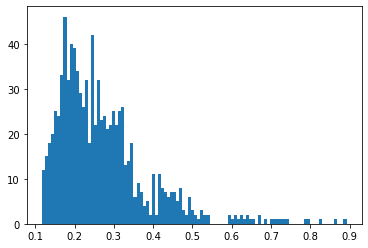

In [75]:
plt.hist(all_scaling, bins=100)